# Programming for Data Analytics Final Project: Wind

### Author: Aoife Flavin

This is my final project for the module Programming for Data Analytics, in Semester 2 of the Higher Diploma in Data Analytics at ATU.

For the purpose of this project, I want to build a windfarm in Cork. I am looking at 3 potential locations for the windfarm:
1. Sherkin Island 
2. Cork Airport
3. Moore Park

I will compare the windpower since 2010 in these locations and then decide on one location to host my windfarm. On my chosen location I will do further analysis on what is the best approach to seting up my windfarm.

The data I am using is from the Historical Data Page of the [Met Eireann website](https://www.met.ie/climate/available-data/historical-data)

### About the Locations

##### Sherkin Island
[Sherkin Island](https://sherkinisland.ie/) is an island which lies off the southwest coast of Ireland it is approximately 3 miles long with a population of about 100, and is only ten minutes by ferry from the small fishing port of Baltimore.


##### Cork Airport
[Cork Airport](https://www.corkairport.com/) is located 6.5 km south of Cork City centre, in an area known as Farmers Cross. It is the second largest Airport in Ireland.

##### Moore Park
[Moore Park](https://www.teagasc.ie/animals/dairy/moorepark/) is a townland in northeast Cork, located near Fermoy. It is a prominent agricultural research campus focusing on milk production.



<img src="windfarm_analysis.jpg" alt="Plot Image" width="1000" height="550" />


### Data Loading and Cleaning

To begin my analysis I imported the necessary libraries, loaded my three datasets into dataframes, renamed the columns and cleaned the data.

In [48]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import linregress

from matplotlib.dates import DateFormatter


In [27]:
# Function to load and clean a dataset
def load_and_clean_data(file_path, skiprows, column_names, numeric_columns):
    df = pd.read_csv(file_path, skiprows=skiprows, dtype=str, low_memory=False)
    
    df.columns = column_names
    
    # keep only relevant columns
    df = df.iloc[:, :len(column_names)]
    
    # Convert to float
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    
    # datetime
    df["Date and Time (UTC)"] = pd.to_datetime(
        df["Date and Time (UTC)"], 
        format="%d-%b-%Y %H:%M", 
        errors="coerce"
    )
    
    # drop rows with invalid dates
    df.dropna(subset=["Date and Time (UTC)"], inplace=True)
    
    # Drop nan values
    df.dropna(how="all", inplace=True)
    
    return df

# Sherkin Island 
sherkin_column_names = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)"
]
sherkin_numeric_columns = [
    "Precipitation Amount (mm)",
    "Air Temperature (C)",
    "Wet Bulb Temperature (C)",
    "Dew Point Temperature (C)",
    "Vapour Pressure (hPa)",
    "Relative Humidity (%)",
    "Mean Sea Level Pressure (hPa)",
    "Mean Wind Speed (knot)",
    "Predominant Wind Direction (degree)"
]
df = load_and_clean_data('sherkin_island_weather.csv', skiprows=17, 
                         column_names=sherkin_column_names, 
                         numeric_columns=sherkin_numeric_columns)

# Cork Airport 
cork_column_names = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)", "Synop code for Present Weather", "Synop code for Past Weather", 
    "Sunshine duration (hours)", "Visibility (m)", "Cloud height (100's of ft)", "Cloud amount"
]
cork_numeric_columns = [
    "Precipitation Amount (mm)",
    "Air Temperature (C)",
    "Wet Bulb Temperature (C)",
    "Dew Point Temperature (C)",
    "Vapour Pressure (hPa)",
    "Relative Humidity (%)",
    "Mean Sea Level Pressure (hPa)",
    "Mean Wind Speed (knot)",
    "Predominant Wind Direction (degree)"
    "Sunshine duration (hours)"
    "Visibility (m)"
    "Cloud height (100's of ft)"
    "Cloud amount"
]
ca_df = load_and_clean_data('cork_airport_weather.csv', skiprows=23, 
                            column_names=cork_column_names, 
                            numeric_columns=cork_numeric_columns)

# Moore Park 
moore_column_names = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)"
]
moore_numeric_columns = [
    "Precipitation Amount (mm)",
    "Air Temperature (C)",
    "Wet Bulb Temperature (C)",
    "Dew Point Temperature (C)",
    "Vapour Pressure (hPa)",
    "Relative Humidity (%)",
    "Mean Sea Level Pressure (hPa)",
    "Mean Wind Speed (knot)",
    "Predominant Wind Direction (degree)"
]
mp_df = load_and_clean_data('moore_park_weather.csv', skiprows=17, 
                            column_names=moore_column_names, 
                            numeric_columns=moore_numeric_columns)



#https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
#https://www.datacamp.com/tutorial/loc-vs-iloc
#https://www.w3schools.com/python/pandas/pandas_cleaning_wrong_format.asp
#https://www.w3schools.com/python/pandas/ref_df_dropna.asp

### Comparison of Sites

To compare my three sites I first filtered the data to look at 2010 onwards as each of the datasets begin at a different point in time and I wanted to look at the exact same periods of time for each. 

In [28]:
# Filter data from 2010 onwards
# Sherkin Island
df_filtered = df[df["Date and Time (UTC)"].dt.year >= 2010][["Date and Time (UTC)", "Mean Wind Speed (knot)"]]

# Cork Airport
ca_df_filtered = ca_df[ca_df["Date and Time (UTC)"].dt.year >= 2010][["Date and Time (UTC)", "Mean Wind Speed (knot)"]]

# Moore Park
mp_df_filtered = mp_df[mp_df["Date and Time (UTC)"].dt.year >= 2010][["Date and Time (UTC)", "Mean Wind Speed (knot)"]]

#https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas-2/

#### Wind Speed Distribution 

Taking an initial look at some statistics it looks like Sherkin Island has the highest mean windspeed at ~12.5 knots, while Moore Park has the lowest mean windspeed at ~6 knots, with Cork airport sitting in the middle with a mean windspeed of 9.7 knots. The median and mean of this data is very similar suggesting that the data is symmetrically distributed. 

Sherkin Island has the highest standard deviation at (symbol)6.7 knots meaning that this location has a larger fluctuation in windspeed compared to cork airport at 5.05 knots and Moore Park at 3.67 knots.

In [29]:
sherkin_stats = {
    "mean": df_filtered["Mean Wind Speed (knot)"].mean(),
    "median": df_filtered["Mean Wind Speed (knot)"].median(),
    "std_dev": df_filtered["Mean Wind Speed (knot)"].std()
}

cork_stats = {
    "mean": ca_df_filtered["Mean Wind Speed (knot)"].mean(),
    "median": ca_df_filtered["Mean Wind Speed (knot)"].median(),
    "std_dev": ca_df_filtered["Mean Wind Speed (knot)"].std()
}

moore_stats = {
    "mean": mp_df_filtered["Mean Wind Speed (knot)"].mean(),
    "median": mp_df_filtered["Mean Wind Speed (knot)"].median(),
    "std_dev": mp_df_filtered["Mean Wind Speed (knot)"].std()
}

print(f'Sherkin Island Stats {sherkin_stats}')
print(f'Cork Airport Stats {cork_stats}')
print(f'Moore Park Stats {moore_stats}')

#https://www.w3schools.com/python/python_dictionaries.asp
#https://docs.python.org/3/library/statistics.html

Sherkin Island Stats {'mean': 12.438033468963196, 'median': 12.0, 'std_dev': 6.704963953657147}
Cork Airport Stats {'mean': 9.671178810162969, 'median': 9.0, 'std_dev': 5.048097961834734}
Moore Park Stats {'mean': 5.985999680601078, 'median': 5.0, 'std_dev': 3.6671172839443833}


The following graph confirms the above statistics. 

For Sherkin Island The distribution is broader, with a higher frequency of higher wind speeds suggesting Sherkin Island experiences stronger winds more frequently compared to the other locations.

The Cork Airport distribution is narrower, it experiences moderate winds more consistently.

The Moore Park distribution is skewed toward lower wind speeds, indicating that this location generally experiences calmer conditions.

The above data is logical given that Sherkin Island is a coastal Island while Cork Airport and Moore Park are more sheltered and further inland.

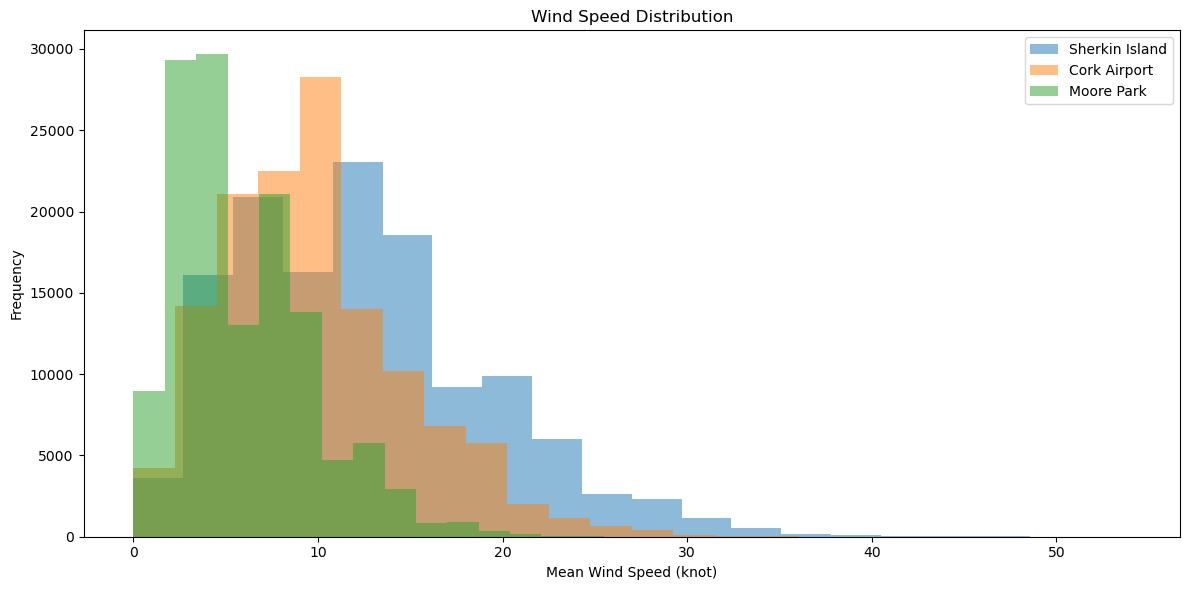

In [30]:
# Plot wind speed data
plt.figure(figsize=(12, 6))

# Sherkin Island
plt.hist(df_filtered["Mean Wind Speed (knot)"], bins=20, alpha=0.5, label="Sherkin Island")

# Cork Airport
plt.hist(ca_df_filtered["Mean Wind Speed (knot)"], bins=20, alpha=0.5, label="Cork Airport")

# Moore Park
plt.hist(mp_df_filtered["Mean Wind Speed (knot)"], bins=20, alpha=0.5, label="Moore Park")

# design
plt.title("Wind Speed Distribution")
plt.xlabel("Mean Wind Speed (knot)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

#https://builtin.com/articles/beautify-matplotlib-histogram
#https://www.geeksforgeeks.org/how-to-plot-a-histogram-with-various-variables-in-matplotlib-in-python/

#### Wind Speed Variability

Looking at the statistics and the box plot below I was able to determine:

Sherkin Island:
The interquartile range (IQR) is quite wide, indicating more variability in wind speeds.
A significant number of outliers extend beyond 30 knots, showing frequent occurrences of strong winds.

Cork Airport:
The IQR is narrower than Sherkin Island, suggesting less variability in wind speeds.
Fewer extreme outliers compared to Sherkin Island.

Moore Park:
The IQR is the narrowest, indicating the least variability in wind speeds.
Outliers are present but less frequent and lower in magnitude compared to Sherkin Island.

In [31]:
# function to calculate stats
def calculate_statistics(df, location_name):
    stats = {
        "Location": location_name,
        "Min": df["Mean Wind Speed (knot)"].min(),
        "Max": df["Mean Wind Speed (knot)"].max(),
        "IQR": df["Mean Wind Speed (knot)"].quantile(0.75) - df["Mean Wind Speed (knot)"].quantile(0.25),
    }
    return stats

# by location
sherkin_stats = calculate_statistics(df_filtered, "Sherkin Island")
cork_stats = calculate_statistics(ca_df_filtered, "Cork Airport")
moore_stats = calculate_statistics(mp_df_filtered, "Moore Park")

# results
stats_summary = pd.DataFrame([sherkin_stats, cork_stats, moore_stats])
print(stats_summary)


         Location  Min   Max  IQR
0  Sherkin Island  0.0  54.0  9.0
1    Cork Airport  0.0  45.0  7.0
2      Moore Park  0.0  34.0  5.0


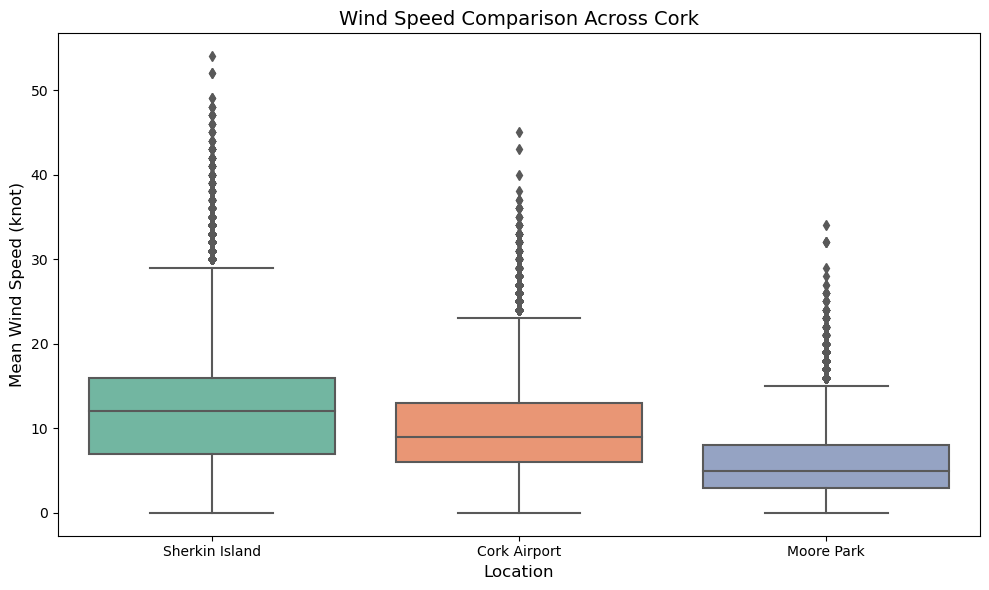

In [32]:
# Make a single dataframe
df_filtered["Location"] = "Sherkin Island"
ca_df_filtered["Location"] = "Cork Airport"
mp_df_filtered["Location"] = "Moore Park"

combined_df = pd.concat([df_filtered, ca_df_filtered, mp_df_filtered])

# boxplot for wind speed across locations
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x="Location", y="Mean Wind Speed (knot)", palette="Set2")
plt.title("Wind Speed Comparison Across Cork", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Mean Wind Speed (knot)", fontsize=12)
plt.tight_layout()
plt.show()

#https://www.geeksforgeeks.org/types-of-seaborn-plots/
#https://www.datacamp.com/tutorial/python-boxplots

Based on the analysis of wind speed data, I have chosen Sherkin Island as the optimal location for establishing my windfarm. With a mean wind speed of 12.44 knots and a median of 12.0 knots, Sherkin Island consistently experiences higher wind speeds compared to the other locations analysed. 

While Cork Airport also exhibits relatively high wind speeds (mean: 9.67 knots, median: 9.0 knots) and lower variability (standard deviation: 5.05 knots compared to Sherkin Island's 6.70 knots), its proximity to the airport presents logistical and safety challenges, making Cork Airport an unsuitable location despite its favorable wind characteristics. 

Moore Park, with significantly lower wind speeds (mean: 5.99 knots, median: 5.0 knots), does not meet the requirements for efficient wind energy production. 

The combination of high and consistent wind speeds on Sherkin Island, along with its likely greater suitability from a regulatory and logistical standpoint, makes it the most viable choice for the wind farm.

Plots I could do:
- Summary Statistics: Compute mean, median, variance, and standard deviation for each weather variable (e.g., temperature, humidity, wind speed).
- Seasonal Patterns: Plot time series to observe daily or seasonal trends.
- Windspeed over a single day / week / year
- Max windspeed over time
- Heatwaves/Cold Spells: Detect extended periods of high or low temperatures.
- Storm Events: Identify periods with unusually high wind speeds or rainfall
- Heatmaps: Use heatmaps for hourly or daily patterns (e.g., temperature across the hours of the day over a month).
- Variable Interdependence: Explore how variables like temperature, humidity, and wind speed correlate.
- Trend Analysis: Identify long-term trends in temperature, precipitation, or wind speed over the period of data collection.
- Machine Learning Models: Use regression or classification models to predict specific outcomes, like rainfall.

### Sherkin Island Analysis

Having decided on placing my windfarm on Sherkin Island I wanted to do a more in depth analysis of the characteristics of the wind in this location.

I first looked at the variability of the weather patterns in the summer vs the winter

In [33]:
#Create a column for date and month
df["Month"] = df["Date and Time (UTC)"].dt.month
df["Date"] = df["Date and Time (UTC)"].dt.date

In [34]:
# Filter data for winter (Nov-Feb) and summer (May-Aug)
winter_months = [11, 12, 1, 2]
summer_months = [5, 6, 7, 8]


# filter winter and summer data
winter_data = df[df["Month"].isin(winter_months)]
summer_data = df[df["Month"].isin(summer_months)]

# create function for summary stats
def compute_summary_statistics(data, variable_name):
    stats = {
        "Mean": np.mean(data),
        "Variance": np.var(data),
        "Standard Deviation": np.std(data)
    }
    return stats

# calculate winter stats
winter_stats = {
    "Temperature (C)": compute_summary_statistics(winter_data["Air Temperature (C)"], "Temperature"),
    "Humidity (%)": compute_summary_statistics(winter_data["Relative Humidity (%)"], "Humidity"),
    "Wind Speed (knot)": compute_summary_statistics(winter_data["Mean Wind Speed (knot)"], "Wind Speed"),
}

# calculate summer stats
summer_stats = {
    "Temperature (C)": compute_summary_statistics(summer_data["Air Temperature (C)"], "Temperature"),
    "Humidity (%)": compute_summary_statistics(summer_data["Relative Humidity (%)"], "Humidity"),
    "Wind Speed (knot)": compute_summary_statistics(summer_data["Mean Wind Speed (knot)"], "Wind Speed"),
}

# Display results
print("Winter Summary Statistics:")
for variable, stats in winter_stats.items():
    print(f"{variable}: {stats}")

print("\nSummer Summary Statistics:")
for variable, stats in summer_stats.items():
    print(f"{variable}: {stats}")


#https://www.geeksforgeeks.org/get-month-from-date-in-pandas-python/
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
#https://www.geeksforgeeks.org/compute-the-mean-standard-deviation-and-variance-of-a-given-numpy-array/

Winter Summary Statistics:
Temperature (C): {'Mean': 8.582857779759252, 'Variance': 7.562280135163025, 'Standard Deviation': 2.7499600242845395}
Humidity (%): {'Mean': 83.58485092943822, 'Variance': 110.38165821784693, 'Standard Deviation': 10.506267568353993}
Wind Speed (knot): {'Mean': 14.527702042286126, 'Variance': 58.98682197901954, 'Standard Deviation': 7.680287883863439}

Summer Summary Statistics:
Temperature (C): {'Mean': 13.927253587276908, 'Variance': 6.174930483972515, 'Standard Deviation': 2.4849407405353783}
Humidity (%): {'Mean': 85.07631263563631, 'Variance': 107.30878785445677, 'Standard Deviation': 10.358995504123785}
Wind Speed (knot): {'Mean': 10.58454536620129, 'Variance': 27.87140314839977, 'Standard Deviation': 5.27933737777761}


##### **Winter Summary Statistics:**
- **Temperature (C):** Mean: 8.58°C with a standard deviation of 2.75°C indicates that winter temperatures are relatively mild and stable. Mild winters reduce the risk of [ice formation on turbines](https://www.forbes.com/sites/scottcarpenter/2021/02/16/why-wind-turbines-in-cold-climates-dont-freeze-de-icing-and-carbon-fiber/), which can negatively impact performance.
  
- **Humidity (%):** Mean: 83.58% with a standard deviation of 10.51% suggests consistently high humidity levels. High humidity can contribute to condensation on turbines but is manageable with maintenance, Ireland is generally a very humid country so this problem would be consistent throughout the country.
  
- **Wind Speed (knot):** Mean: 14.53 knots with a standard deviation of 7.68 knots shows strong and moderately variable winds in winter. The high mean wind speed is excellent for strong energy production during the winter, the time at which people are using the highest amounts of electricity. The variability, while notable, is within the [range for efficient and safe turbine operation](https://www.neso.energy/document/13526/download?).

##### **Summer Summary Statistics:**
- **Temperature (C):** Mean: 13.93°C with a standard deviation of 2.48°C shows slightly warmer and still stable summer conditions.
  
- **Humidity (%):** Mean: 85.08% with a standard deviation of 10.36% indicates similarly high humidity levels as in winter. 
  
- **Wind Speed (knot):** Mean: 10.58 knots with a standard deviation of 5.28 knots reflects lower and less variable wind speeds compared to winter. While energy production will be lower in summer due to reduced wind speeds, the mean is still enough to sustain productive turbine operation.


**Conclusion:**
Sherkin Island offers highly favorable conditions for a wind farm, with strong winds in winter driving peak energy production and moderate but sufficient winds in summer ensuring steady operation. While the variability in wind speeds and consistently high humidity levels require some consideration, these factors are not serious deterrents. The location's strong wind profile and manageable environmental conditions make it an excellent candidate for wind energy development.

#### Daily Fluctuations
To investigate seasonal wind speed variations, I analysed wind speed data across different days throughout the year at Sherkin. The graph below illustrates significant seasonal fluctuations, comparing wind speeds on a representative day in November, August, May, and February. Further analysis of randomly selected days throughout the year revealed considerable day-to-day variability in wind speeds.

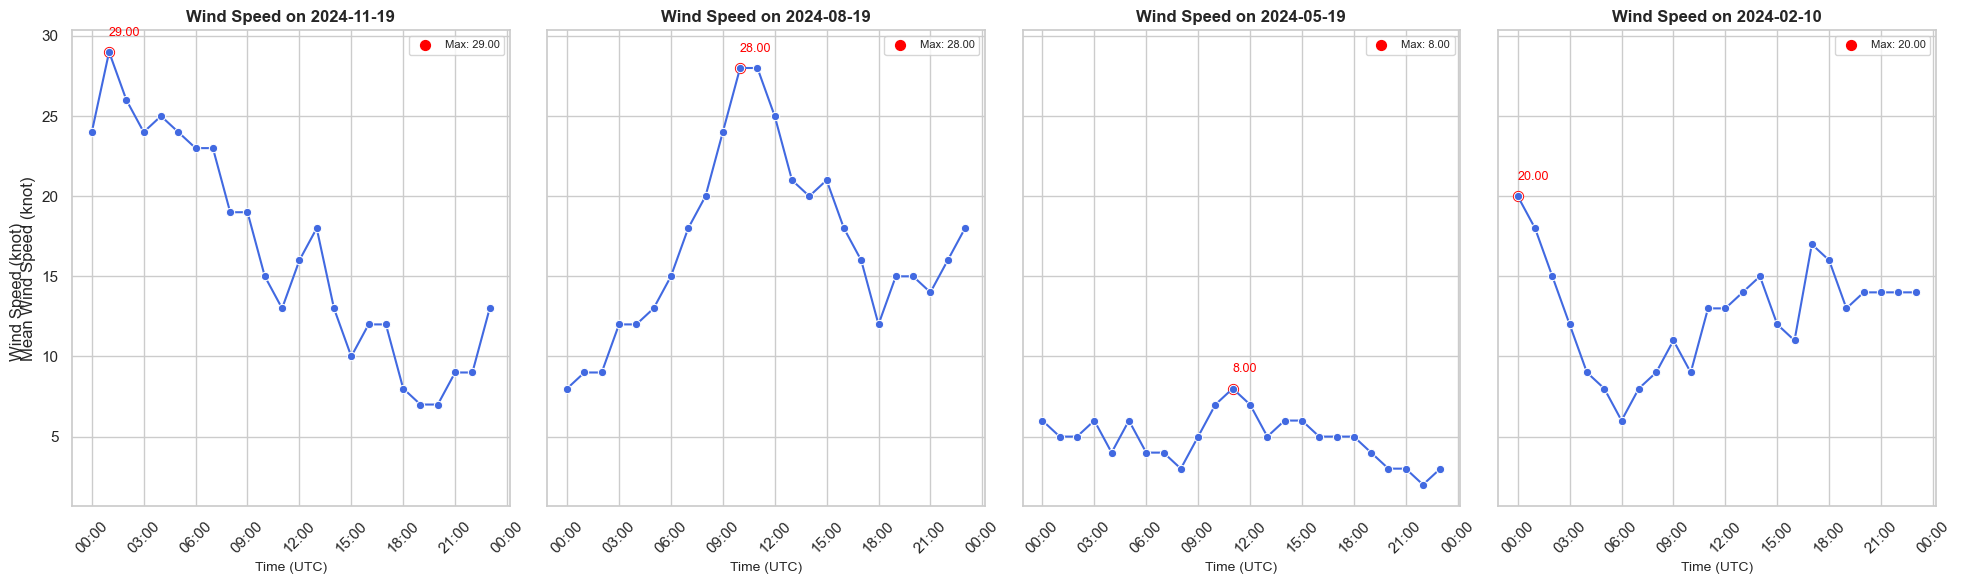

In [51]:
# dates
dates = ["2024-11-19", "2024-08-19", "2024-05-19", "2024-02-10"]

# seaborn style
sns.set_theme(style="whitegrid")

# 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# For loop over dates
for i, specific_date in enumerate(dates):
    # Filter data for the specific date
    filtered_data = df[df["Date and Time (UTC)"].dt.date == pd.to_datetime(specific_date).date()]
    
    # use seaborn to plot windspeed
    sns.lineplot(
        x="Date and Time (UTC)", 
        y="Mean Wind Speed (knot)", 
        data=filtered_data, 
        marker='o', 
        color='royalblue', 
        ax=axes[i]
    )
    
    # max wind speed label
    if not filtered_data.empty:
        max_speed = filtered_data["Mean Wind Speed (knot)"].max()
        max_time = filtered_data[filtered_data["Mean Wind Speed (knot)"] == max_speed]["Date and Time (UTC)"].iloc[0]
        axes[i].scatter(max_time, max_speed, color='red', s=50, label=f"Max: {max_speed:.2f}")
        axes[i].text(max_time, max_speed + 1, f"{max_speed:.2f}", color='red', fontsize=9)
    
    # titles & labels
    axes[i].set_title(f"Wind Speed on {specific_date}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Time (UTC)", fontsize=10)
    axes[i].xaxis.set_major_formatter(DateFormatter("%H:%M"))
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].legend(fontsize=8)

# y label
fig.supylabel("Wind Speed (knot)", fontsize=12)


plt.tight_layout()
plt.show()

#https://seaborn.pydata.org/generated/seaborn.lineplot.html
#https://stackoverflow.com/questions/63647545/highlight-a-single-point-with-a-marker-in-lineplot
#https://www.w3schools.com/python/matplotlib_subplot.asp
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
#https://www.geeksforgeeks.org/enumerate-in-python/
#https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/

#### Weekly Fluctuations

The following plot highlights the substantial intra-weekly variability in wind speed. This November week showcases a wide range, with maximum wind speeds reaching 39 knots on the 23rd, plummeting to less than 5 knots on the 26th, and then rebounding to approximately 30 knots by the week's end.

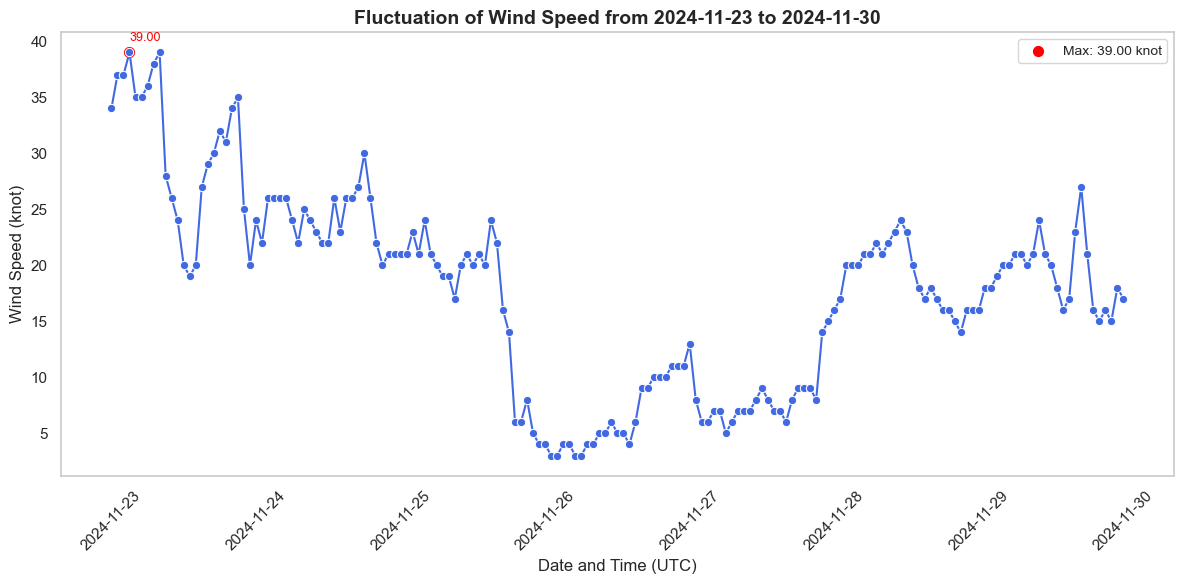

In [54]:
# Date range for the week
start_date = "2024-11-23"
end_date = "2024-11-30"

# Filter data for the specified week
filtered_data = df[(df["Date and Time (UTC)"] >= pd.to_datetime(start_date)) & 
                   (df["Date and Time (UTC)"] <= pd.to_datetime(end_date))]

# Set seaborn style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Wind Speed over the week
sns.lineplot(x=filtered_data["Date and Time (UTC)"], 
             y=filtered_data["Mean Wind Speed (knot)"], 
             marker='o', 
             color='royalblue')

# Highlight max wind speed
if not filtered_data.empty:
    max_speed = filtered_data["Mean Wind Speed (knot)"].max()
    max_time = filtered_data[filtered_data["Mean Wind Speed (knot)"] == max_speed]["Date and Time (UTC)"].iloc[0]
    
    plt.scatter(max_time, max_speed, color='red', s=50, label=f"Max: {max_speed:.2f} knot")
    plt.text(max_time, max_speed + 1, f"{max_speed:.2f}", color='red', fontsize=9)

# Set titles & labels
plt.title(f"Fluctuation of Wind Speed from {start_date} to {end_date}", fontsize=14, fontweight='bold')
plt.xlabel("Date and Time (UTC)", fontsize=12)
plt.ylabel("Wind Speed (knot)", fontsize=12)
plt.xticks(rotation=45)

# Customize legend and grid
plt.legend(fontsize=10)
plt.grid()

# Format the x-axis to display time
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))

# Adjust layout
plt.tight_layout()
plt.show()



I then created a plot of the windspeed over a week, using the week with the most recent data.

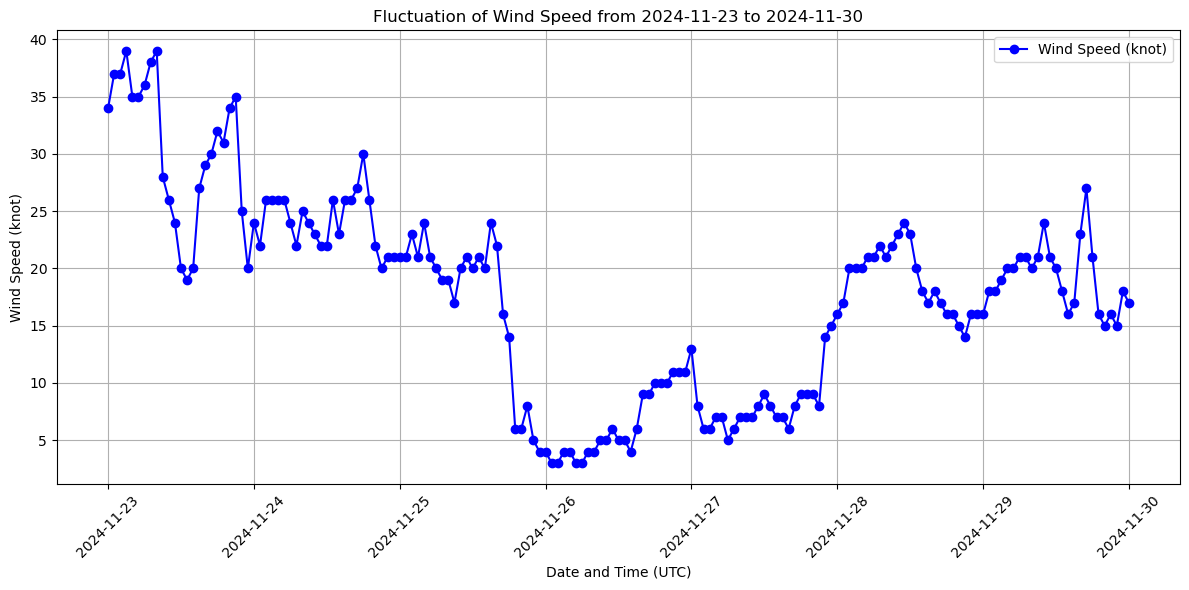

In [36]:
# date range
start_date = "2024-11-23"
end_date = "2024-11-30"

# Filter data
filtered_data = df[(df["Date and Time (UTC)"] >= pd.to_datetime(start_date)) & 
                   (df["Date and Time (UTC)"] <= pd.to_datetime(end_date))]

# Plot Wind Speed over week
plt.figure(figsize=(12, 6))
plt.plot(filtered_data["Date and Time (UTC)"], filtered_data["Mean Wind Speed (knot)"], marker='o', color='blue', label="Wind Speed (knot)")
plt.xlabel("Date and Time (UTC)")
plt.ylabel("Wind Speed (knot)")
plt.title(f"Fluctuation of Wind Speed from {start_date} to {end_date}")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
print(df.columns)

Index(['Date and Time (UTC)', 'Indicator 1', 'Precipitation Amount (mm)',
       'Indicator 2', 'Air Temperature (C)', 'Indicator 3',
       'Wet Bulb Temperature (C)', 'Dew Point Temperature (C)',
       'Vapour Pressure (hPa)', 'Relative Humidity (%)',
       'Mean Sea Level Pressure (hPa)', 'Indicator 4',
       'Mean Wind Speed (knot)', 'Indicator 5',
       'Predominant Wind Direction (degree)', 'Month', 'Date'],
      dtype='object')


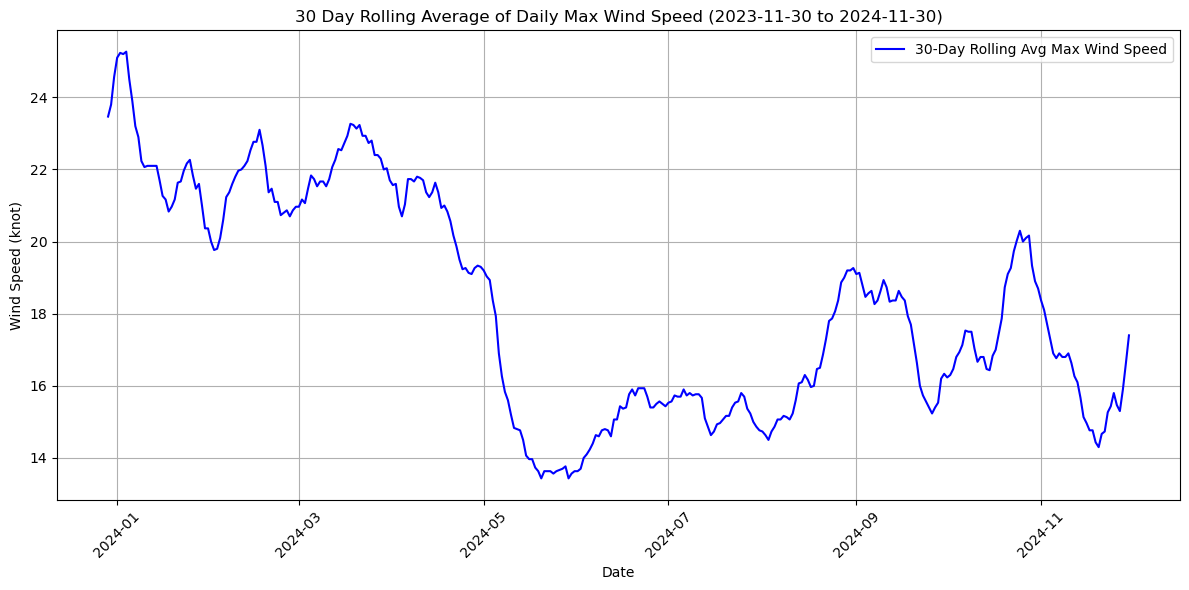

In [38]:
# Define date range
start_date = pd.to_datetime("2023-11-30").date()
end_date = pd.to_datetime("2024-11-30").date()

# filter using date column
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Get daily max wind speed
daily_max_wind = filtered_df.groupby("Date")["Mean Wind Speed (knot)"].max().reset_index()
daily_max_wind.rename(columns={"Mean Wind Speed (knot)": "Daily Max Wind Speed (knot)"}, inplace=True)

#Calculate 30 day rolling average 
daily_max_wind["Rolling Avg Max Wind Speed (knot)"] = daily_max_wind["Daily Max Wind Speed (knot)"].rolling(window=30).mean()

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(daily_max_wind["Date"], daily_max_wind["Rolling Avg Max Wind Speed (knot)"], color='blue', label="30-Day Rolling Avg Max Wind Speed")
plt.xlabel("Date")
plt.ylabel("Wind Speed (knot)")
plt.title(f"30 Day Rolling Average of Daily Max Wind Speed ({start_date} to {end_date})")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

#https://robotwealth.com/rolling-and-expanding-windows-for-dummies/
#https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
#https://sparkbyexamples.com/pandas/pandas-filter-dataframe-rows-on-dates/


I created a Polar plot to determine the correlation between wind speed and wind direction. South Westerly winds are the most powerful. (Look at where the island is and if that is the side facing the atlantic) 

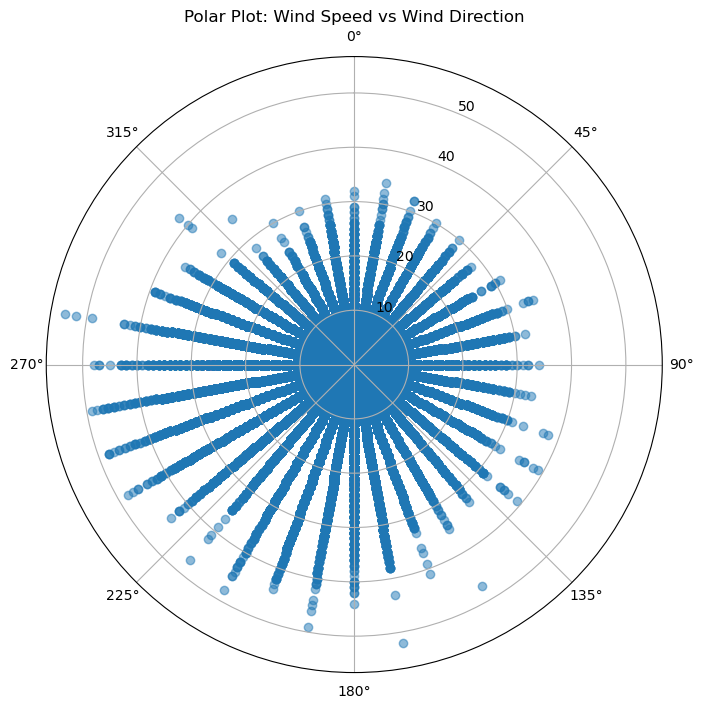

In [39]:
# Convert degrees to radians for polar plot
df["Wind Direction Radians"] = np.deg2rad(df["Predominant Wind Direction (degree)"])

# Create polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.scatter(df["Wind Direction Radians"], df["Mean Wind Speed (knot)"], alpha=0.5)
ax.set_theta_zero_location("N")  #North at the top
ax.set_theta_direction(-1)       # clockwise
ax.set_title("Polar Plot: Wind Speed vs Wind Direction")
plt.show()

# https://www.scaler.com/topics/matplotlib/polar-plot-matplotlib/
# https://www.codecademy.com/resources/docs/numpy/math-methods/deg2rad
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_scatter.html

Investigatig Storms

In [40]:
# thresholds
wind_speed_threshold = 45  # wind speed > 45 knots
precipitation_threshold = 10  # rain > 10 mm

# storms
storm_events = df[
    (df["Mean Wind Speed (knot)"] > wind_speed_threshold) |
    (df["Precipitation Amount (mm)"] > precipitation_threshold)
]

print(f"Number of potential storm events: {len(storm_events)}")

Number of potential storm events: 53


In [41]:
# count the storms
storm_days = storm_events.groupby("Date").size().reset_index(name="Storm Event Count")

# print
print(storm_days)

          Date  Storm Event Count
0   2007-11-17                  1
1   2007-12-09                  2
2   2008-01-09                  1
3   2008-07-29                  1
4   2009-01-17                  2
5   2011-09-30                  1
6   2012-08-15                  1
7   2012-08-28                  1
8   2012-11-20                  1
9   2013-09-28                  1
10  2013-12-27                  3
11  2014-02-08                  3
12  2014-02-12                  3
13  2014-07-18                  1
14  2015-12-30                  2
15  2016-02-08                  8
16  2016-07-09                  1
17  2016-08-01                  1
18  2017-07-18                  1
19  2017-10-16                  2
20  2019-08-08                  1
21  2019-10-01                  1
22  2019-12-08                  1
23  2020-08-15                  1
24  2020-09-02                  1
25  2021-10-08                  1
26  2021-12-07                  5
27  2022-09-05                  1
28  2023-09-24

In [42]:
#Looking at how strong the storms are
storm_severity = storm_events.groupby("Date").agg({
    "Mean Wind Speed (knot)": "max",  # Max wind speed
    "Precipitation Amount (mm)": "sum"  # Total precipitation
}).reset_index()

storm_severity.rename(columns={
    "Mean Wind Speed (knot)": "Max Wind Speed (knot)",
    "Precipitation Amount (mm)": "Total Precipitation (mm)"
}, inplace=True)

print(storm_severity)


          Date  Max Wind Speed (knot)  Total Precipitation (mm)
0   2007-11-17                   18.0                      13.8
1   2007-12-09                   48.0                       1.8
2   2008-01-09                   25.0                      10.1
3   2008-07-29                   11.0                      12.7
4   2009-01-17                   49.0                       2.5
5   2011-09-30                   15.0                      11.4
6   2012-08-15                   22.0                      10.6
7   2012-08-28                   22.0                      15.4
8   2012-11-20                   13.0                      10.4
9   2013-09-28                   13.0                      10.8
10  2013-12-27                   47.0                       0.1
11  2014-02-08                   48.0                       1.0
12  2014-02-12                   54.0                       1.4
13  2014-07-18                    7.0                      11.1
14  2015-12-30                   48.0   

Mention that you googled some of the dates above to find some of the biggest storms ie. storm Ophelia.
Explain what speed in km/hr 40 knots is.

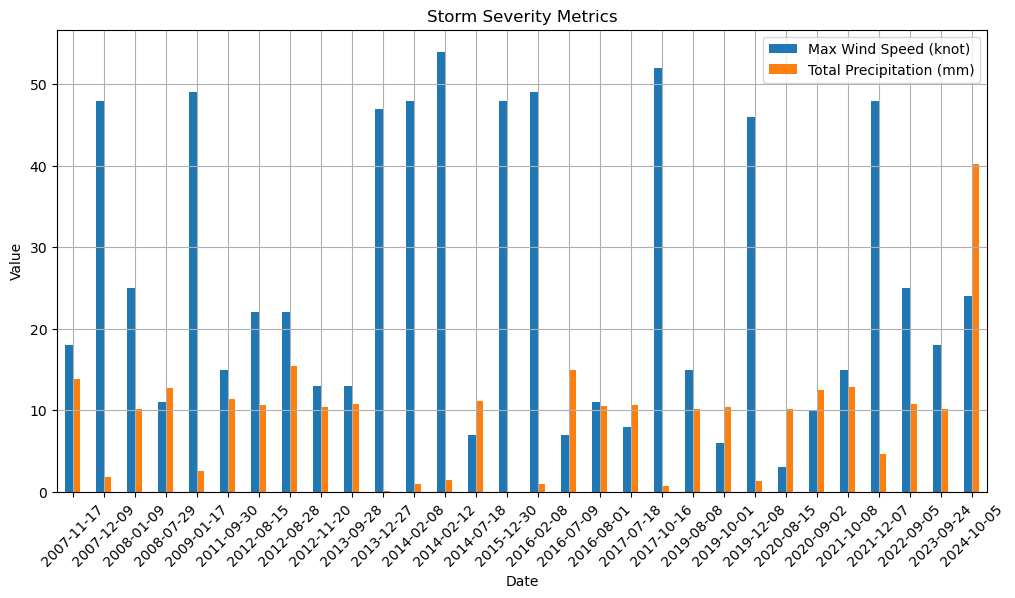

In [43]:
#plot it
storm_severity.plot(
    x="Date", 
    y=["Max Wind Speed (knot)", "Total Precipitation (mm)"], 
    kind="bar",
    figsize=(12, 6),
    title="Storm Severity Metrics"
)
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.grid()
plt.show()

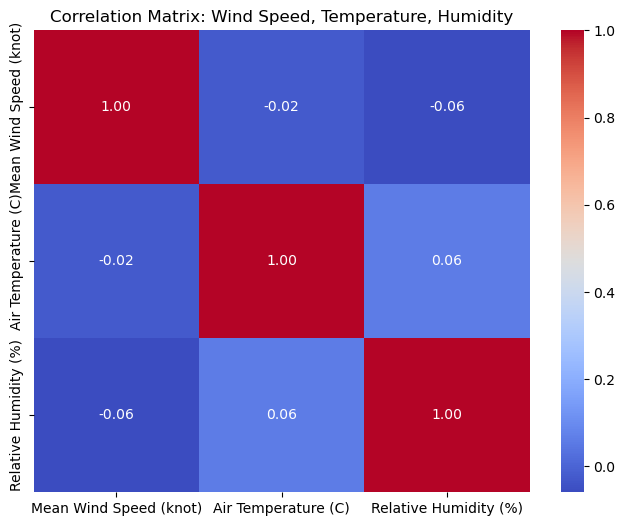

In [44]:
#Measuring the variable interdependance - is there any correlation between windspeed, humidity and temperature
# Filter dates
start_date = pd.to_datetime("2020-11-30").date()
end_date = pd.to_datetime("2024-11-30").date()
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


correlation_data = filtered_df[["Mean Wind Speed (knot)", "Air Temperature (C)", "Relative Humidity (%)"]]

# Make the correlation matrix
correlation_matrix = correlation_data.corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Wind Speed, Temperature, Humidity")
plt.show()

#https://www.w3schools.com/datascience/ds_stat_correlation_matrix.asp
#https://www.datacamp.com/tutorial/seaborn-heatmaps
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

C:\Users\aoife.000\AppData\Local\Temp\ipykernel_13468\1518610634.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Season"] = filtered_df["Date and Time (UTC)"].dt.month.apply(get_season)


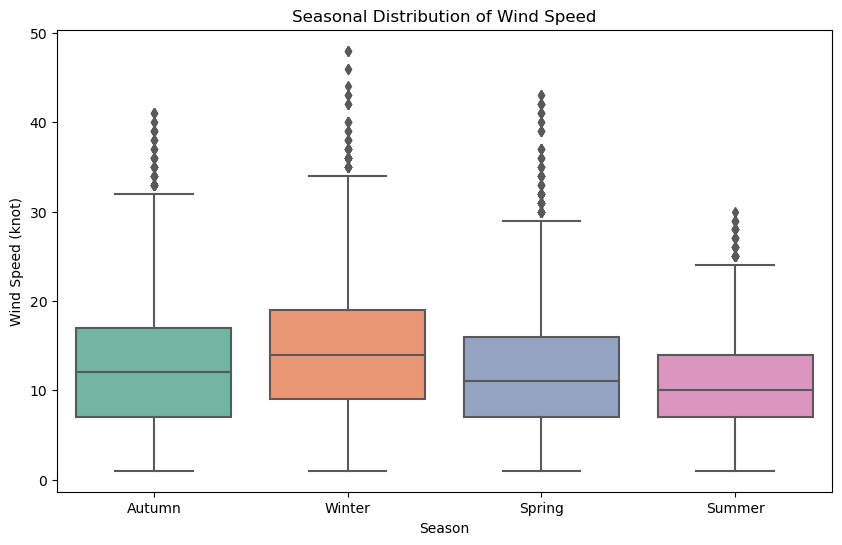

In [45]:
# make a season column
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

filtered_df["Season"] = filtered_df["Date and Time (UTC)"].dt.month.apply(get_season)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x="Season", y="Mean Wind Speed (knot)", palette="Set2")
plt.title("Seasonal Distribution of Wind Speed")
plt.xlabel("Season")
plt.ylabel("Wind Speed (knot)")
plt.show()

#https://www.geeksforgeeks.org/types-of-seaborn-plots/
#https://www.datacamp.com/tutorial/python-boxplots


Slope: 0.0274
P-value: 0.2547
R-squared: 0.0714


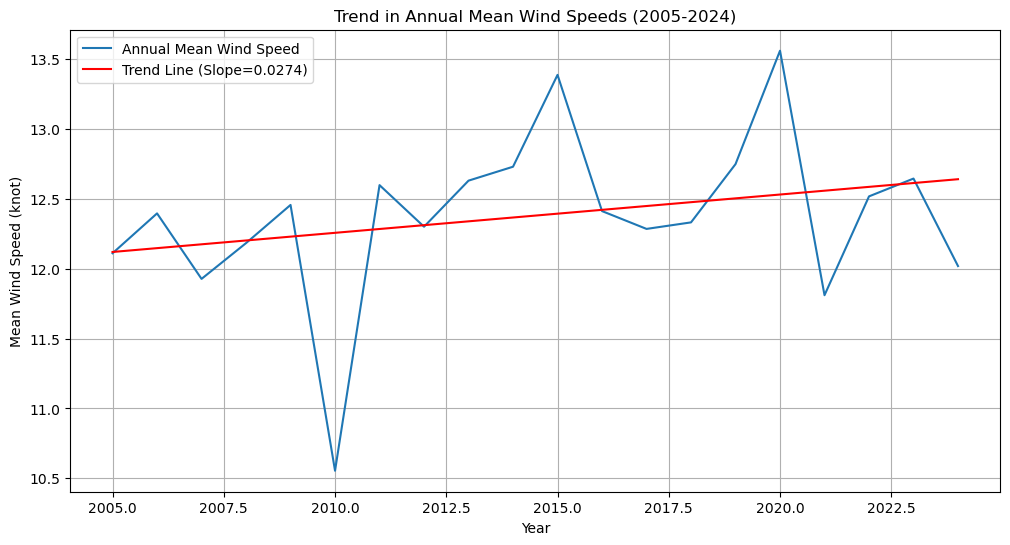

In [46]:
# set dates
start_date = pd.to_datetime("2005-01-01").date()
end_date = pd.to_datetime("2024-11-30").date()

# date range
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# make a copy
filtered_df = filtered_df.copy()

# Make a year column
filtered_df['Year'] = filtered_df['Date and Time (UTC)'].dt.year
# average mean windspeed
filtered_df['Year'] = filtered_df['Date and Time (UTC)'].dt.year
annual_mean_wind_speed = filtered_df.groupby('Year')['Mean Wind Speed (knot)'].mean().reset_index()

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    annual_mean_wind_speed['Year'], 
    annual_mean_wind_speed['Mean Wind Speed (knot)']
)

# results
print(f"Slope: {slope:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# plot it
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_mean_wind_speed, x="Year", y="Mean Wind Speed (knot)", label="Annual Mean Wind Speed")
plt.plot(
    annual_mean_wind_speed["Year"], 
    intercept + slope * annual_mean_wind_speed["Year"], 
    color="red", label=f"Trend Line (Slope={slope:.4f})"
)
plt.title("Trend in Annual Mean Wind Speeds (2005-2024)")
plt.xlabel("Year")
plt.ylabel("Mean Wind Speed (knot)")
plt.legend()
plt.grid()
plt.show()

#https://stackoverflow.com/questions/58909624/what-is-the-use-of-reset-index-in-pandas
#https://www.w3schools.com/python/pandas/ref_df_reset_index.asp
#https://realpython.com/linear-regression-in-python/
#https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/

Slope:
If the slope is significantly different from zero (check 
p
p-value), it indicates a trend in wind speeds over time.


P-value:
A 
p
p-value less than 0.05 suggests that the trend is statistically significant.


R-squared:
The 
R
2
R 
2
  value indicates how well the linear model explains the variation in wind speeds over time. A higher value means a better fit.

Explanation of Results
From your regression analysis:
Slope: 
0.0274
0.0274 suggests a slight upward trend in wind speeds over time.


P-value: 
0.2547
0.2547, which is greater than 
0.05
0.05, indicates that this trend is not statistically significant.


R-squared: 
0.0714
0.0714 means only 7.14% of the variation in wind speeds is explained by the regression model, suggesting a weak relationship.


Given these results, there is no strong evidence of a significant trend in wind speeds over the analyzed period. Wind speeds are likely to remain relatively stable over time based on this analysis.